In [16]:
import os
print(os.path.abspath('dataset_overview.ipynb'))


/content/dataset_overview.ipynb


In [1]:
# 📌 YOLO 모델 사용을 위한 패키지 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ROBOFLOW_API_KEY")  # 환경변수에서 불러옴
project = rf.workspace("industrialaicapstone").project("capstone_project-iwcq5")
version = project.version(9)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to capstone_project-9 in yolov8:: 100%|██████████| 3184/3184 [00:00<00:00, 5535.10it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


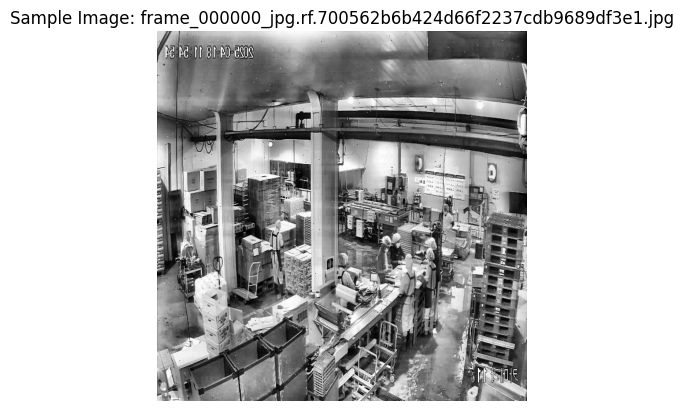


[어노테이션 파일: frame_000000_jpg.rf.700562b6b424d66f2237cdb9689df3e1.txt]
2 0.73046875 0.70390625 0.053125 0.25234375
2 0.67578125 0.72890625 0.04921875 0.253125
1 0.503125 0.61796875 0.02578125 0.0390625
1 0.646875 0.56171875 0.0234375 0.03203125
2 0.65390625 0.59453125 0.05078125 0.0984375
1 0.6203125 0.56875 0.0265625 0.03125
0 0.6796875 0.6890625 0.0453125 0.09453125
1 0.73828125 0.60390625 0.02578125 0.0375
1 0.7421875 0.57578125 0.0265625 0.03828125
0 0.73359375 0.6671875 0.04375 0.08125
2 0.5046875 0.6625 0.0703125 0.13828125
1 0.328125 0.5234375 0.01875 0.028125
1 0.68046875 0.625 0.02109375 0.04296875
2 0.6171875 0.61796875 0.0453125 0.13203125
2 0.3234375 0.6203125 0.040625 0.2203125
2 0.78515625 0.5046875 0.03671875 0.0796875
0 0.32265625 0.5671875 0.040625 0.0625
1 0.7828125 0.4765625 0.01328125 0.01953125
0 0.50703125 0.66953125 0.06484375 0.0625
0 0.784375 0.51484375 0.034375 0.0515625


In [12]:
import os

# 예시로 사용할 train 이미지 폴더 및 라벨 폴더 경로
img_dir = '/content/capstone_project-9/train/images'
label_dir = '/content/capstone_project-9/train/labels'

# 이미지-라벨 쌍 하나 선택 (예: 폴더 첫 번째)
sample_img = sorted([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])[0]
sample_img_path = os.path.join(img_dir, sample_img)
sample_label_path = os.path.join(label_dir, os.path.splitext(sample_img)[0] + ".txt")

# PIL로 이미지 로드 및 matplotlib 시각화
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(sample_img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"Sample Image: {sample_img}")
plt.show()

# 어노테이션(txt) 파일 내용 출력
print(f"\n[어노테이션 파일: {os.path.basename(sample_label_path)}]")
with open(sample_label_path, 'r') as f:
    ann_lines = f.readlines()
    for line in ann_lines:
        print(line.strip())


In [6]:
import os

# 클래스 이름 리스트
CLASS_NAMES = ['gown_on', 'hairnet_on', 'person']
class_counts = {i: 0 for i in range(len(CLASS_NAMES))}  # 클래스 번호별로 개수 초기화

# 모든 어노테이션(txt) 폴더 경로
label_paths = [
    '/content/capstone_project-9/train/labels',
    '/content/capstone_project-9/valid/labels',
    '/content/capstone_project-9/test/labels'
]

# 각 폴더 순회하면서 .txt 파일을 읽는다
for folder in label_paths:
    for file in os.listdir(folder):
        if file.endswith('.txt'):
            with open(os.path.join(folder, file), 'r') as f:
                for line in f:
                    class_id = int(line.strip().split()[0])  # 첫 숫자가 클래스 번호
                    if class_id in class_counts:
                        class_counts[class_id] += 1

# 결과 출력
print("✅ 클래스별 객체 수:")
for class_id, count in class_counts.items():
    print(f" - {CLASS_NAMES[class_id]}: {count}개")


✅ 클래스별 객체 수:
 - gown_on: 3273개
 - hairnet_on: 4018개
 - person: 4492개


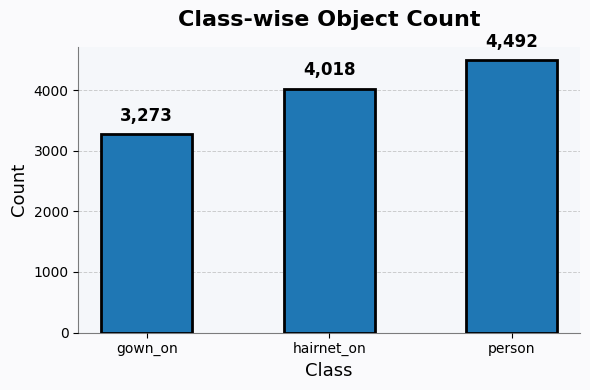

In [8]:
import matplotlib.pyplot as plt

labels = CLASS_NAMES
counts = [class_counts[i] for i in range(len(CLASS_NAMES))]

fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(labels, counts, edgecolor='black', linewidth=2, width=0.5, zorder=2)

# 숫자 레이블 추가
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,}',  # 천 단위 구분
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 7),  # 위쪽 7픽셀
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_title("Class-wise Object Count", fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel("Class", fontsize=13, fontweight='medium')
ax.set_ylabel("Count", fontsize=13, fontweight='medium')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_alpha(0.5)
ax.spines['bottom'].set_alpha(0.5)

ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

fig.patch.set_facecolor('#fafafc')
ax.set_facecolor('#f5f7fa')

plt.tight_layout()
plt.show()


In [5]:
import os  # 파일 경로 처리를 위한 파이썬 모듈

# 각 데이터 경로 설정
train_path = '/content/capstone_project-9/train/images'
val_path = '/content/capstone_project-9/valid/images'
test_path = '/content/capstone_project-9/test/images'  # 상대경로 ../test/images → 절대경로로 변경

# 🔸 폴더 안의 .jpg, .png 같은 이미지 파일 수를 세는 함수 정의
def count_images(path):
    return len([f for f in os.listdir(path) if f.endswith(('.jpg', '.png', '.jpeg'))])

# 🔹 이미지 개수 출력
print(f"✅ Train 이미지 수: {count_images(train_path)}장")
print(f"✅ Validation 이미지 수: {count_images(val_path)}장")
print(f"✅ Test 이미지 수: {count_images(test_path)}장")


✅ Train 이미지 수: 1359장
✅ Validation 이미지 수: 132장
✅ Test 이미지 수: 95장


In [9]:
import os
import random
import shutil
from glob import glob

# 🔹 현재 이미지/라벨 폴더 경로들
base_dir = '/content/capstone_project-9'
image_dirs = [
    os.path.join(base_dir, 'train/images'),
    os.path.join(base_dir, 'valid/images'),
    os.path.join(base_dir, 'test/images')
]
label_dirs = [
    os.path.join(base_dir, 'train/labels'),
    os.path.join(base_dir, 'valid/labels'),
    os.path.join(base_dir, 'test/labels')
]

# 🔹 모든 이미지/라벨 파일 경로 리스트로 수집 (.jpg/.txt)
all_images = []
all_labels = []

for img_dir, lbl_dir in zip(image_dirs, label_dirs):
    for img_path in glob(os.path.join(img_dir, '*.jpg')):
        filename = os.path.basename(img_path)
        label_path = os.path.join(lbl_dir, filename.replace('.jpg', '.txt'))
        if os.path.exists(label_path):  # 라벨이 있는 경우만
            all_images.append(img_path)
            all_labels.append(label_path)

# 🔹 이미지와 라벨 쌍 묶기
paired = list(zip(all_images, all_labels))
random.shuffle(paired)  # 무작위 셔플

# 🔹 총 수와 목표 수 계산
total = len(paired)
n_train = int(total * 0.75)
n_val = int(total * 0.15)
n_test = total - n_train - n_val

# 🔹 새로 나눌 데이터셋
splits = {
    'train': paired[:n_train],
    'valid': paired[n_train:n_train + n_val],
    'test': paired[n_train + n_val:]
}

# 🔹 새로 옮길 디렉토리 생성
for split in splits:
    os.makedirs(os.path.join(base_dir, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, split, 'labels'), exist_ok=True)

# 🔹 파일 이동
for split, items in splits.items():
    for img_path, label_path in items:
        shutil.move(img_path, os.path.join(base_dir, split, 'images', os.path.basename(img_path)))
        shutil.move(label_path, os.path.join(base_dir, split, 'labels', os.path.basename(label_path)))

print("✅ 모든 데이터를 75:15:10 비율로 재분할 완료했습니다.")


✅ 모든 데이터를 75:15:10 비율로 재분할 완료했습니다.


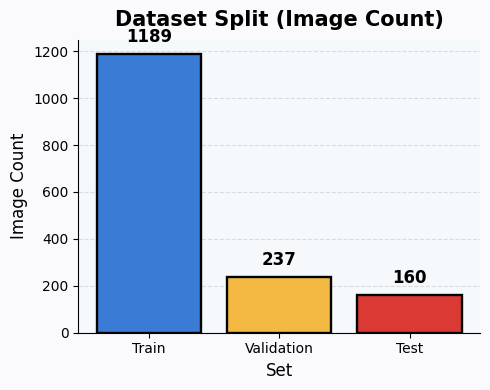

In [10]:
import matplotlib.pyplot as plt

counts = [count_images(train_path), count_images(val_path), count_images(test_path)]
labels = ['Train', 'Validation', 'Test']

fig, ax = plt.subplots(figsize=(5,4))
bars = ax.bar(labels, counts, color=['#3a7bd5', '#f4b942', '#db3a34'], edgecolor='black', linewidth=1.7, zorder=2)

# 바 위에 숫자 레이블 표시
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 6),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12, fontweight='semibold')

ax.set_title("Dataset Split (Image Count)", fontsize=15, fontweight='bold', pad=10)
ax.set_xlabel("Set", fontsize=12)
ax.set_ylabel("Image Count", fontsize=12)

ax.set_axisbelow(True)
ax.grid(axis='y', linestyle='--', alpha=0.4, linewidth=0.8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.patch.set_facecolor('#fafafc')
ax.set_facecolor('#f6f9fb')

plt.tight_layout()
plt.show()
